<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/mlp_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 6s 13ms/step - loss: 0.6730 - accuracy: 0.5579 - val_loss: 0.3237 - val_accuracy: 0.8560
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2302 - accuracy: 0.9090 - val_loss: 0.2996 - val_accuracy: 0.8768
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 0.0745 - accuracy: 0.9788 - val_loss: 0.3962 - val_accuracy: 0.8640
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0152 - accuracy: 0.9974 - val_loss: 0.5098 - val_accuracy: 0.8620
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.5704 - val_accuracy: 0.8628
Epoch 6/100
176/176 [==============================] - 2s 11ms/step - loss: 6.7599e-04 - accuracy: 1.0000 - val_loss: 0.6038 - val_accuracy: 0.8616
Epoch 7/100
176/176 [==============================] - 2s 11ms/step - loss: 3.9075e-04 - accuracy: 1.0000 - val_los

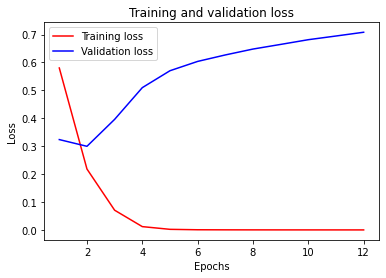

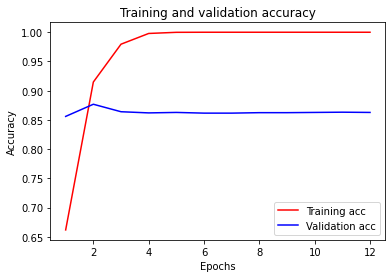

              precision    recall  f1-score   support

           0      0.858     0.900     0.879     12500
           1      0.895     0.851     0.872     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.875     25000
weighted avg      0.876     0.876     0.875     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 2s 11ms/step - loss: 0.6572 - accuracy: 0.5726 - val_loss: 0.3150 - val_accuracy: 0.8600
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2086 - accuracy: 0.9203 - val_loss: 0.2955 - val_accuracy: 0.8776
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0683 - accuracy: 0.9834 - val_loss: 0.4397 - val_accuracy: 0.8540
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0139 - accuracy: 0.9983 - val_loss: 0.4930 - val_accuracy: 0.8688
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

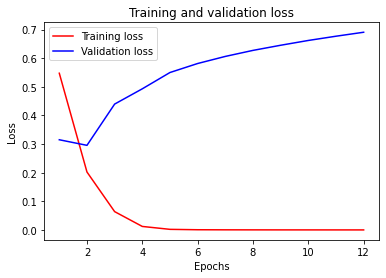

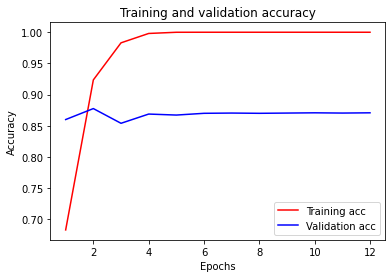

              precision    recall  f1-score   support

           0      0.881     0.869     0.875     12500
           1      0.871     0.883     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 2s 12ms/step - loss: 0.6713 - accuracy: 0.5704 - val_loss: 0.3307 - val_accuracy: 0.8564
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2263 - accuracy: 0.9111 - val_loss: 0.2828 - val_accuracy: 0.8872
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0946 - accuracy: 0.9721 - val_loss: 0.3491 - val_accuracy: 0.8776
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0248 - accuracy: 0.9956 - val_loss: 0.4790 - val_accuracy: 0.8636
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

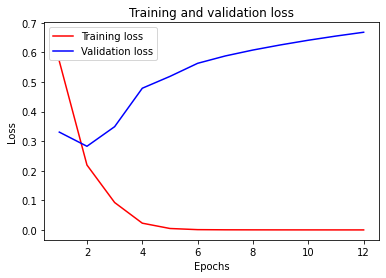

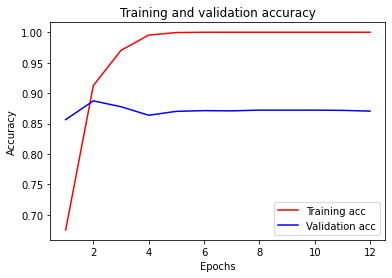

              precision    recall  f1-score   support

           0      0.885     0.867     0.876     12500
           1      0.870     0.887     0.878     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6779 - accuracy: 0.5396 - val_loss: 0.3439 - val_accuracy: 0.8488
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2191 - accuracy: 0.9134 - val_loss: 0.3175 - val_accuracy: 0.8660
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0698 - accuracy: 0.9817 - val_loss: 0.4122 - val_accuracy: 0.8564
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 0.5161 - val_accuracy: 0.8600
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

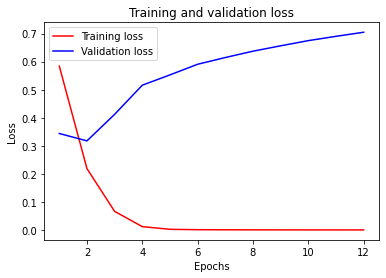

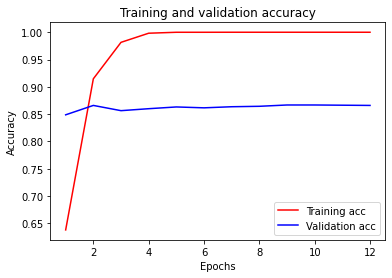

              precision    recall  f1-score   support

           0      0.895     0.845     0.869     12500
           1      0.853     0.900     0.876     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6815 - accuracy: 0.5549 - val_loss: 0.3301 - val_accuracy: 0.8536
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2277 - accuracy: 0.9117 - val_loss: 0.2848 - val_accuracy: 0.8728
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0878 - accuracy: 0.9758 - val_loss: 0.3632 - val_accuracy: 0.8632
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0190 - accuracy: 0.9968 - val_loss: 0.4831 - val_accuracy: 0.8584
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

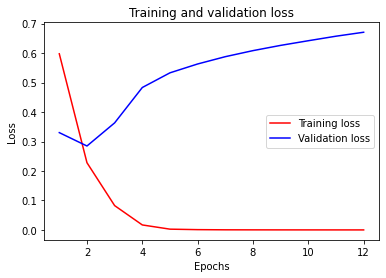

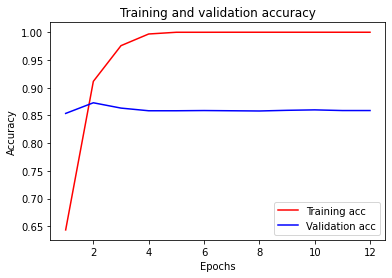

              precision    recall  f1-score   support

           0      0.864     0.890     0.877     12500
           1      0.886     0.860     0.873     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6308 - accuracy: 0.6043 - val_loss: 0.2887 - val_accuracy: 0.8760
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1903 - accuracy: 0.9293 - val_loss: 0.3083 - val_accuracy: 0.8736
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0595 - accuracy: 0.9855 - val_loss: 0.3954 - val_accuracy: 0.8664
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 0.4746 - val_accuracy: 0.8708
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

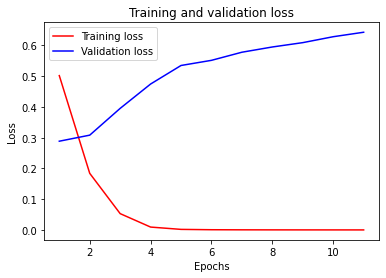

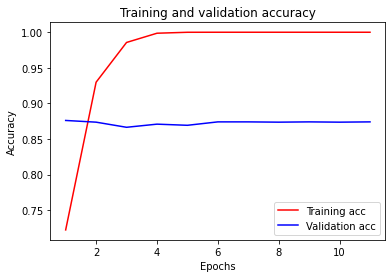

              precision    recall  f1-score   support

           0      0.859     0.886     0.872     12500
           1      0.882     0.854     0.868     12500

    accuracy                          0.870     25000
   macro avg      0.870     0.870     0.870     25000
weighted avg      0.870     0.870     0.870     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6010 - accuracy: 0.6394 - val_loss: 0.2943 - val_accuracy: 0.8796
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1706 - accuracy: 0.9376 - val_loss: 0.3055 - val_accuracy: 0.8856
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0500 - accuracy: 0.9886 - val_loss: 0.3966 - val_accuracy: 0.8752
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0091 - accuracy: 0.9992 - val_loss: 0.4862 - val_accuracy: 0.8756
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

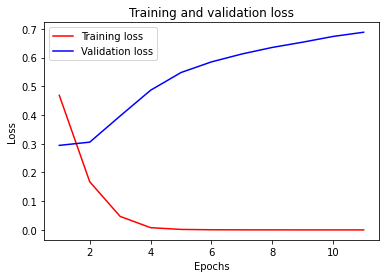

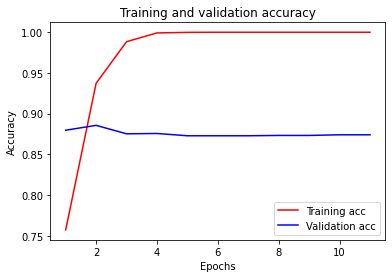

              precision    recall  f1-score   support

           0      0.887     0.849     0.867     12500
           1      0.855     0.891     0.873     12500

    accuracy                          0.870     25000
   macro avg      0.871     0.870     0.870     25000
weighted avg      0.871     0.870     0.870     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6862 - accuracy: 0.5486 - val_loss: 0.3456 - val_accuracy: 0.8524
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2463 - accuracy: 0.9015 - val_loss: 0.2940 - val_accuracy: 0.8812
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0988 - accuracy: 0.9699 - val_loss: 0.3420 - val_accuracy: 0.8748
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0245 - accuracy: 0.9955 - val_loss: 0.4866 - val_accuracy: 0.8684
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

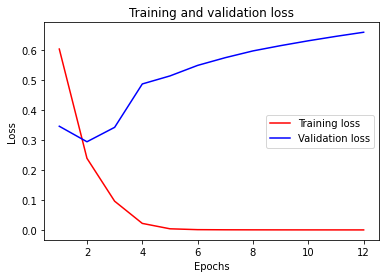

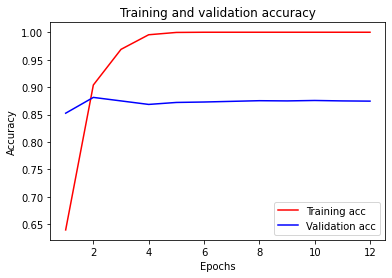

              precision    recall  f1-score   support

           0      0.898     0.846     0.872     12500
           1      0.855     0.904     0.879     12500

    accuracy                          0.875     25000
   macro avg      0.877     0.875     0.875     25000
weighted avg      0.877     0.875     0.875     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6129 - accuracy: 0.6308 - val_loss: 0.3203 - val_accuracy: 0.8680
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1843 - accuracy: 0.9309 - val_loss: 0.3117 - val_accuracy: 0.8784
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0601 - accuracy: 0.9860 - val_loss: 0.3881 - val_accuracy: 0.8784
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0135 - accuracy: 0.9976 - val_loss: 0.4634 - val_accuracy: 0.8728
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

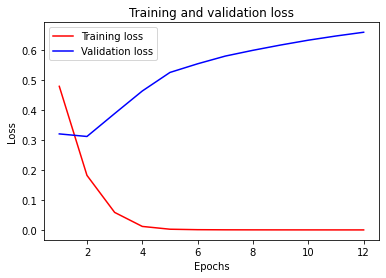

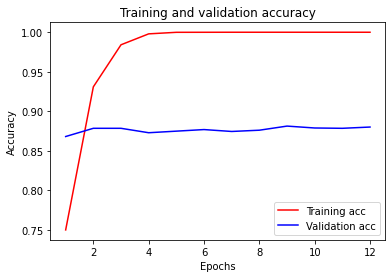

              precision    recall  f1-score   support

           0      0.871     0.877     0.874     12500
           1      0.876     0.870     0.873     12500

    accuracy                          0.874     25000
   macro avg      0.874     0.874     0.874     25000
weighted avg      0.874     0.874     0.874     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.5987 - accuracy: 0.6410 - val_loss: 0.2911 - val_accuracy: 0.8740
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1738 - accuracy: 0.9349 - val_loss: 0.3086 - val_accuracy: 0.8752
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0478 - accuracy: 0.9896 - val_loss: 0.3857 - val_accuracy: 0.8752
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0092 - accuracy: 0.9988 - val_loss: 0.4595 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.

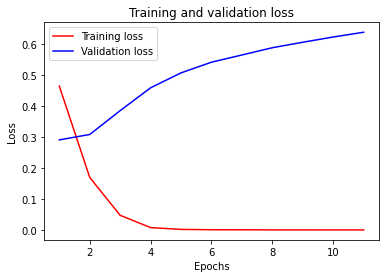

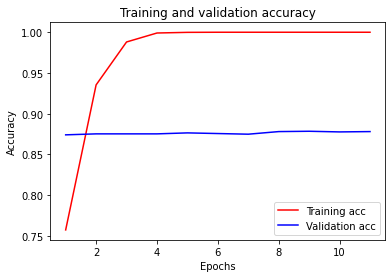

              precision    recall  f1-score   support

           0      0.909     0.826     0.865     12500
           1      0.841     0.917     0.877     12500

    accuracy                          0.872     25000
   macro avg      0.875     0.872     0.871     25000
weighted avg      0.875     0.872     0.871     25000


Average accuracy: 0.8737 (+/- 0.0024)
Average loss: 0.3006 (+/- 0.0049)
Average F1: 0.8747 (+/- 0.0032)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()

  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
